In [1]:
import anvil.server

In [2]:
anvil.server.connect("BUYJA23RALTKFXO4IO55J4AA-ZUEN6HTLQMVDFDGF")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
t0 = time()

In [4]:
df_stroke = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [5]:
df_stroke_row_count, df_stroke_column_count = df_stroke.shape
print("Total no. of rows:", df_stroke_row_count)
print("Total no. of columns:", df_stroke_column_count)

Total no. of rows: 5110
Total no. of columns: 12


In [6]:
df_stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df_stroke.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
print("Unique values are:\n",df_stroke.nunique())

Unique values are:
 id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64


# Data Preprocessing

In [10]:
bmi_outliers = df_stroke[df_stroke["bmi"]>50]
bmi_outliers['bmi'].shape

(79,)

In [11]:
#replacing outlier entries with mean of bmi
df_stroke["bmi"] = df_stroke["bmi"].apply(lambda x: df_stroke.bmi.mean() if x>50 else x)

In [12]:
# Replacing null values of bmi with mean of bmi column
df_stroke.bmi.replace(to_replace=np.nan,value=df_stroke.bmi.mean(), inplace=True)

In [13]:
df_stroke.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [14]:
df_stroke.drop(columns='id',inplace=True)

In [15]:
df_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.451796,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [16]:
df_stroke.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [17]:
df_stroke['gender']=df_stroke['gender'].replace('Other','Male')

In [18]:
df_stroke.replace({ 'gender': {'Male':1 ,'Female':0}} ,inplace=True)
df_stroke.replace({ 'ever_married': {'No':0 ,'Yes':1}} ,inplace=True)
df_stroke.replace({ 'Residence_type': {'Rural':0 ,'Urban':1}} ,inplace=True)
df_stroke.replace({ 'smoking_status': {'Unknown':0 ,'never smoked':1,'formerly smoked':2,'smokes':3}} ,inplace=True)
df_stroke.replace({ 'work_type': {'Private':0 ,'Self-employed':1,'children':2,'Govt_job':3,'Never_worked':4}} ,inplace=True)

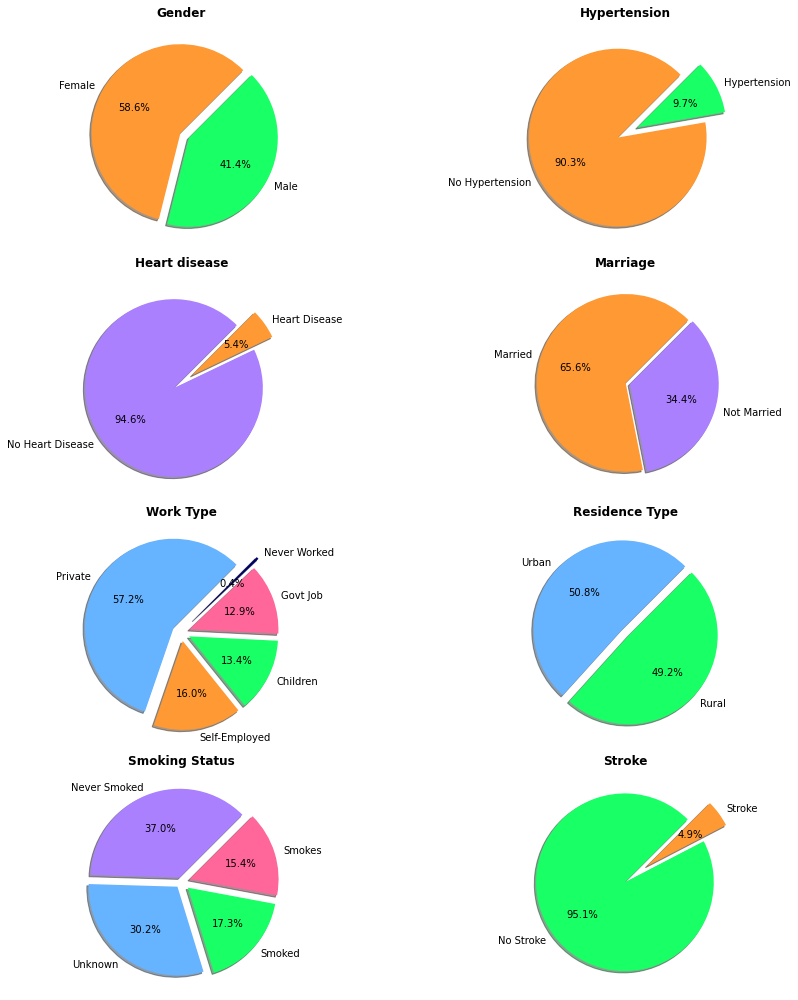

In [19]:
fig, ax = plt.subplots(4,2, figsize = (14,14))
((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = ax

labels = ["Female", "Male"]
values = df_stroke['gender'].value_counts().tolist()[:2]
ax1.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#FF9933','#19FF66'],shadow=True, startangle=45,explode=[0.01, 0.1])
ax1.set_title("Gender", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["No Hypertension", "Hypertension"]
values = df_stroke['hypertension'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#FF9933','#19FF66'],shadow=True,startangle=45,explode=[0.1, 0.15])
ax2.set_title("Hypertension", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["No Heart Disease", "Heart Disease"]
values = df_stroke['heart_disease'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#AA80FF','#FF9933'],shadow=True, startangle=45,explode=[0.1, 0.15])
ax3.set_title("Heart disease", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Married", "Not Married"]
values = df_stroke['ever_married'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#FF9933','#AA80FF'],shadow=True,startangle=45,explode=[0, 0.05])
ax4.set_title("Marriage", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Private", "Self-Employed", "Children", "Govt Job", "Never Worked"]
values = df_stroke['work_type'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#66b3ff','#FF9933','#19FF66','#FF6699','#000066'],shadow=True, startangle=45,explode=[0.1, 0.1, 0.1, 0.1, 0.2])
ax5.set_title("Work Type", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Urban", "Rural"]
values = df_stroke['Residence_type'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#66b3ff','#19FF66'],shadow=True,startangle=45,explode=[0.05, 0.05])
ax6.set_title("Residence Type", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Never Smoked", "Unknown", "Smoked", "Smokes"]
values = df_stroke['smoking_status'].value_counts().tolist()
ax7.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.05, 0.07, 0.1, 0.1],colors=['#AA80FF','#66b3ff','#19FF66','#FF6699'])
ax7.set_title("Smoking Status", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["No Stroke", "Stroke"]
values = df_stroke['stroke'].value_counts().tolist()
ax8.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.01, 0.3],colors=['#19FF66','#FF9933'])
ax8.set_title("Stroke", fontdict={'fontsize': 12},fontweight ='bold')

plt.tight_layout()
plt.show()

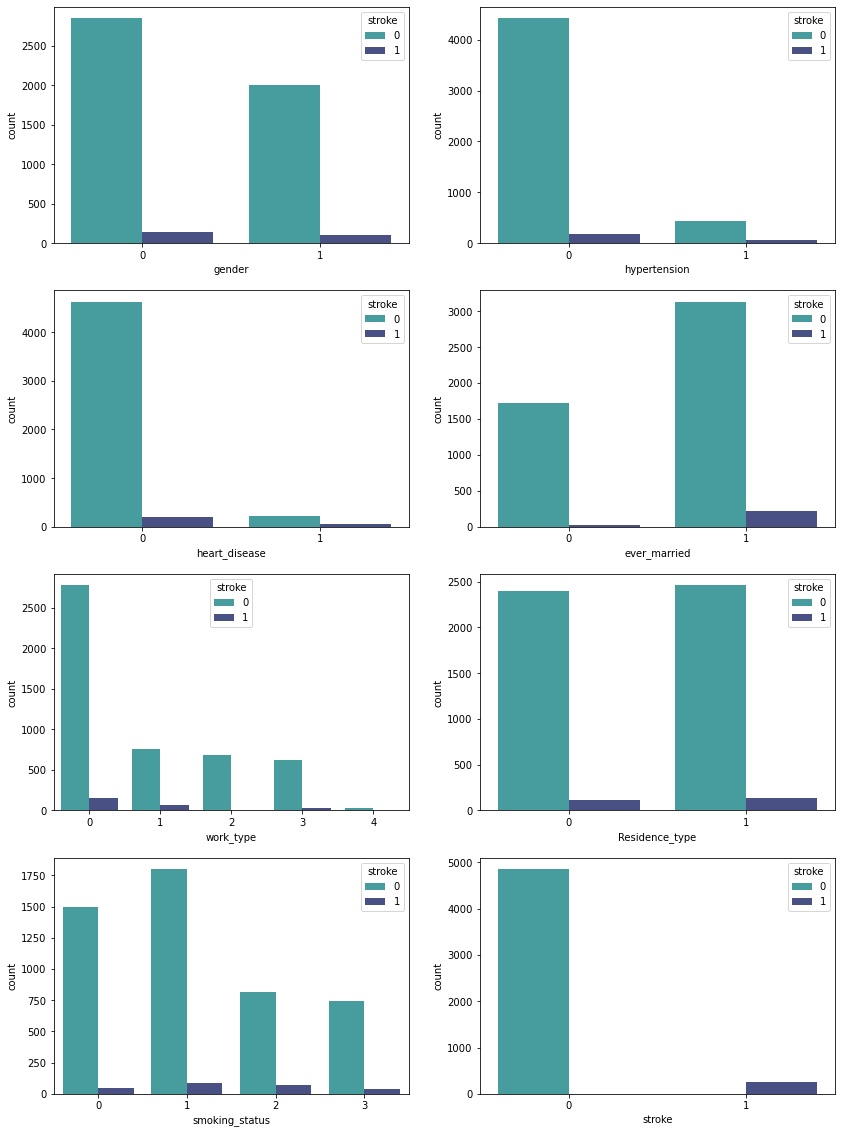

In [20]:
df_st=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status', 'stroke']
fig, axs = plt.subplots(4, 2, figsize=(14,20))
axs = axs.flatten()
for i, col_name in enumerate(df_st):
    sns.countplot(x=col_name, data=df_stroke, ax=axs[i], hue=df_stroke["stroke"], palette="mako_r")

<AxesSubplot:title={'center':'Correlation map for variables'}>

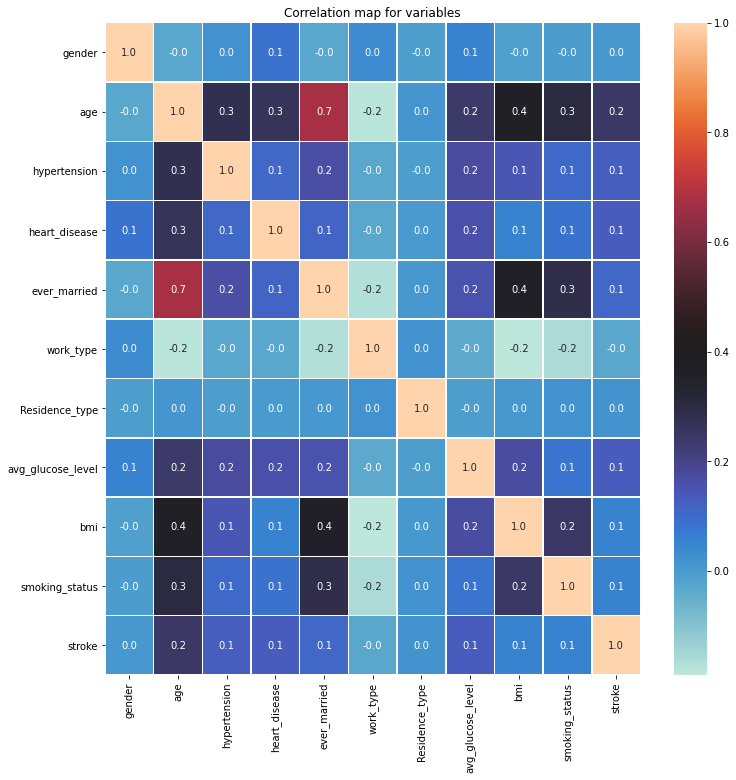

In [21]:
f,ax = plt.subplots(figsize=(12, 12))
ax.set_title('Correlation map for variables')
sns.heatmap(df_stroke.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap="icefire")

# Building Model

In [22]:
X = df_stroke.drop(['stroke'], axis=1)
y = df_stroke['stroke']

# creating dataset split for prediction
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 80-20 split

# Checking split 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (4088, 10)
y_train: (4088,)
X_test: (1022, 10)
y_test: (1022,)


In [23]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Random Forest Classifier Accuracy: 93.9334637964775 %


<AxesSubplot:>

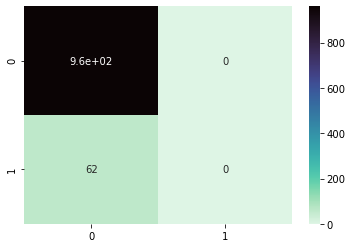

In [24]:
from sklearn import metrics
print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True,cmap="mako_r")

In [25]:
df_stroke.head

<bound method NDFrame.head of       gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          0   
1          0  61.0             0              0             1          1   
2          1  80.0             0              1             1          0   
3          0  49.0             0              0             1          0   
4          0  79.0             1              0             1          1   
...      ...   ...           ...            ...           ...        ...   
5105       0  80.0             1              0             1          0   
5106       0  81.0             0              0             1          1   
5107       0  35.0             0              0             1          1   
5108       1  51.0             0              0             1          0   
5109       0  44.0             0              0             1          3   

      Residence_type  avg_glucose_level        bmi  smoki

In [26]:
inp = [[1,32,1,1,0,1,0,202,36.6,2]]
out = clf.predict(inp)
print(out)

[0]


In [27]:
@anvil.server.callable
def predict_stroke(gender, age, hypertension, disease, married, work, residence, glucose, bmi, smoking):
 out1 = clf.predict([[gender, age, hypertension, disease, married, work, residence, glucose, bmi, smoking]])
 op = str(out1[0])
 return op

Exception in thread Thread-7:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\anvil\server.py", line 403, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "C:\Users\DELL\anaconda3\lib\site-packages\anvil\server.py", line 395, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "C:\Users\DELL\anaconda3\lib\site-packages\anvil\_threaded_server.py", line 423, in do_call
    raise error_from_server
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\DELL\anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\anvil\server.py", line 206, in heartbeat_until_reo

Anvil websocket closed (code 1006, reason=Going away)
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnecti